In [2]:
%matplotlib inline

import neurolab as nl
import numpy as np
import matplotlib.pylab as pl

pl.style.use('ggplot')
pl.rcParams["figure.figsize"] = [12, 9]

In [3]:
def display_obj(obj):
    for i in obj:
        element = 0
        line = 5
        for j in range(25):
            element = element + 1
            if element > 5:
                element = 1
                line = line - 1
            if i[j] == 1:
                pl.plot(element, line, 'ro', markersize=20)
        
        pl.show()

In [4]:
n = 4

chars = ['N', 'E', 'R', 'O']
d = np.array([1, 2, 3, 4])

xtrain = np.array([[1, 0, 0, 0, 1,
                  1, 1, 0, 0, 1,
                  1, 0, 1, 0, 1,
                  1, 0, 0, 1, 1,
                  1, 0, 0, 0, 1],
                 [1, 1, 1, 1, 1,
                  1, 0, 0, 0, 0,
                  1, 1, 1, 1, 1,
                  1, 0, 0, 0, 0,
                  1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 0,
                  1, 0, 0, 0, 1,
                  1, 1, 1, 1, 0,
                  1, 0, 0, 1, 0,
                  1, 0, 0, 0, 1],
                 [0, 1, 1, 1, 0,
                  1, 0, 0, 0, 1,
                  1, 0, 0, 0, 1,
                  1, 0, 0, 0, 1,
                  0, 1, 1, 1, 0]])

N = np.array([1, 0, 0, 0, 1,
              1, 1, 0, 0, 1,
              1, 0, 1, 0, 1,
              1, 0, 0, 1, 1,
              1, 0, 0, 0, 1])

E = np.array([1, 1, 1, 1, 1,
              1, 0, 0, 0, 0,
              1, 1, 1, 1, 1,
              1, 0, 0, 0, 0,
              1, 1, 1, 1, 1])

R = np.array([1, 1, 1, 1, 0,
              1, 0, 0, 0, 1,
              1, 1, 1, 1, 0,
              1, 0, 0, 1, 0,
              1, 0, 0, 0, 1])

O = np.array([0, 1, 1, 1, 0,
              1, 0, 0, 0, 1,
              1, 0, 0, 0, 1,
              1, 0, 0, 0, 1,
              0, 1, 1, 1, 0])

xtrain[xtrain == 0] = -1

In [5]:
net = nl.net.newhop(xtrain, max_init=15)

In [6]:
print("Test on train samples:")

y = net.sim(xtrain)

for i in range(n):
    print(chars[i], (y[i] == xtrain[i]).all())

Test on train samples:
N True
E True
R True
O True


In [7]:
xtest = np.asarray([0, 0, 0, 0, 0,
                    1, 1, 0, 0, 1,
                    1, 1, 0, 0, 1,
                    1, 0, 1, 1, 1,
                    0, 0, 0, 1, 1])


xtest[xtest==0] = -1
print(xtest)
y = net.sim([xtest])

for i in range(n):
    print(chars[i], (y == xtrain[i]).all())

[-1 -1 -1 -1 -1  1  1 -1 -1  1  1  1 -1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1]
N True
E False
R False
O False


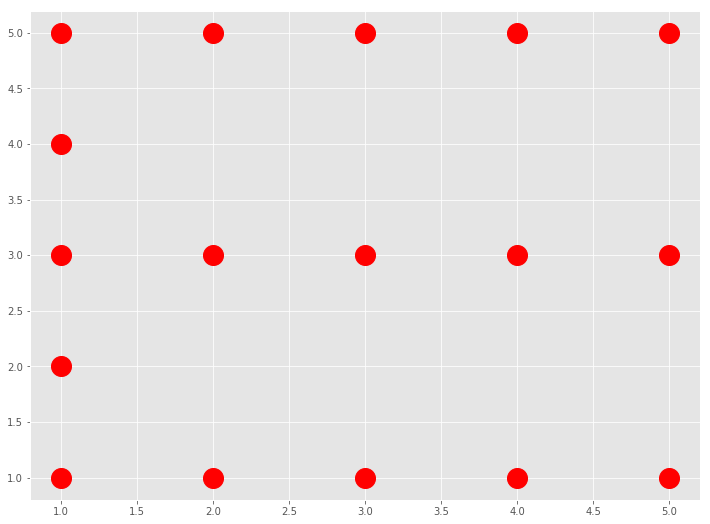

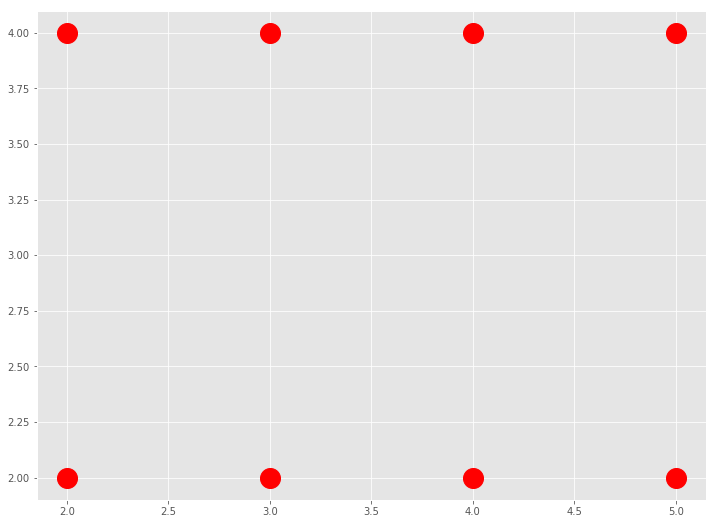

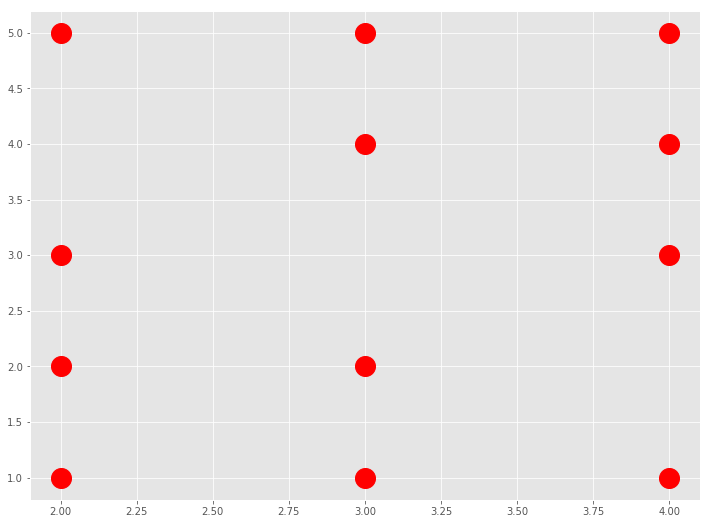

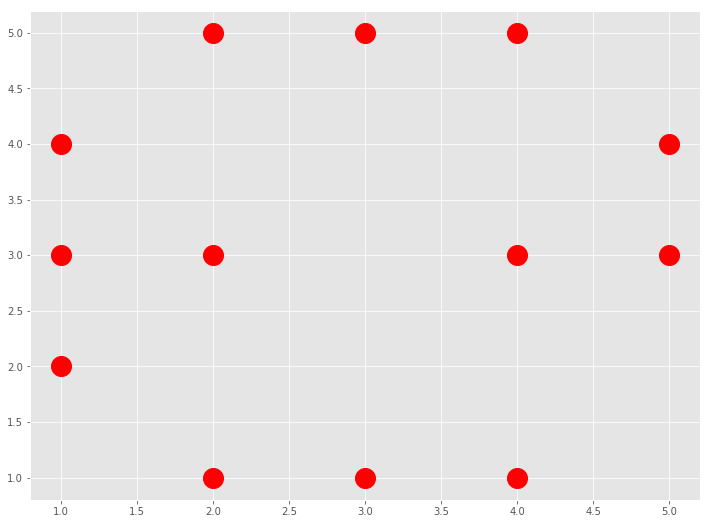

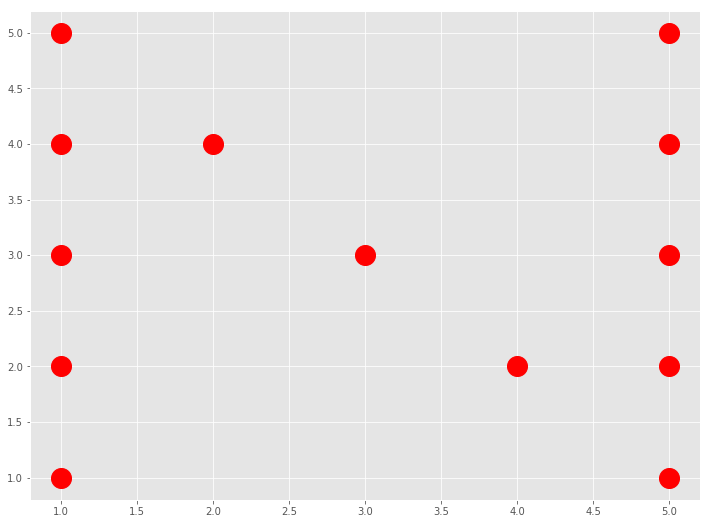

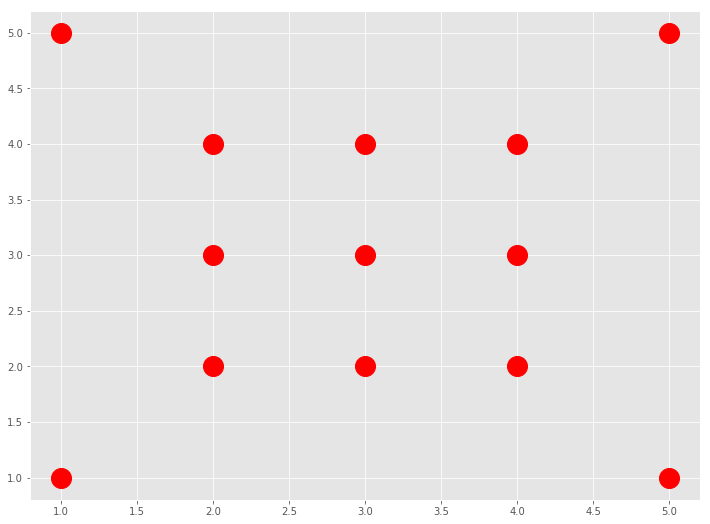

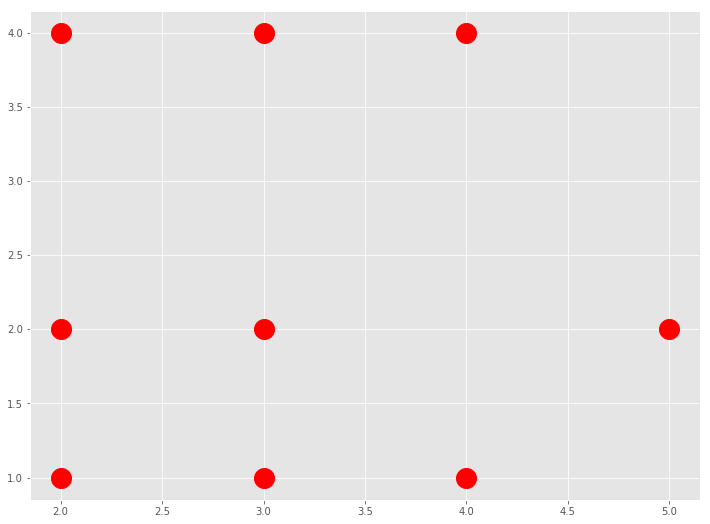

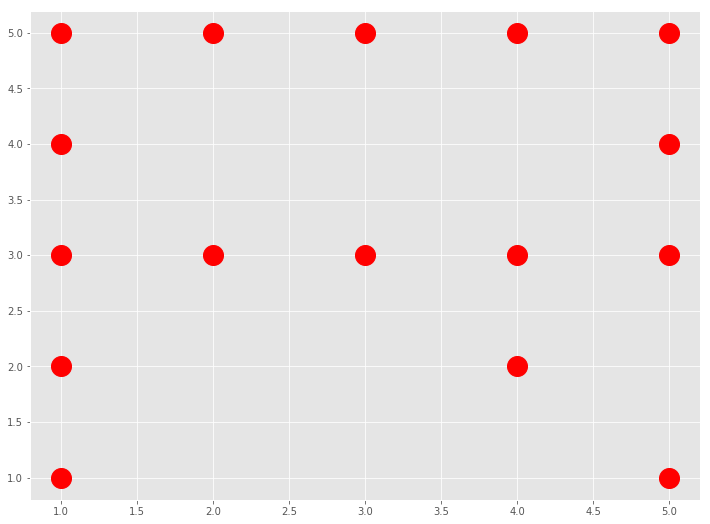

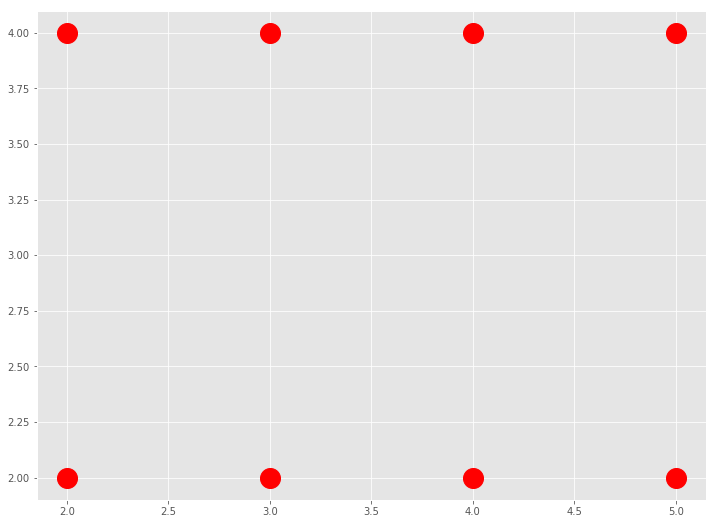

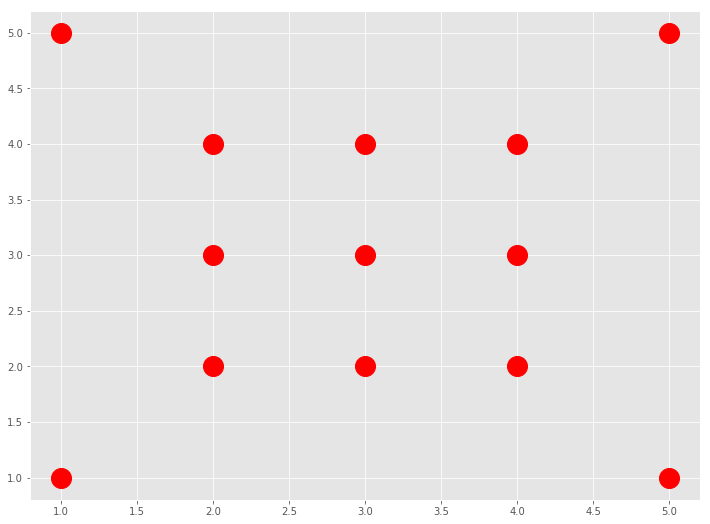

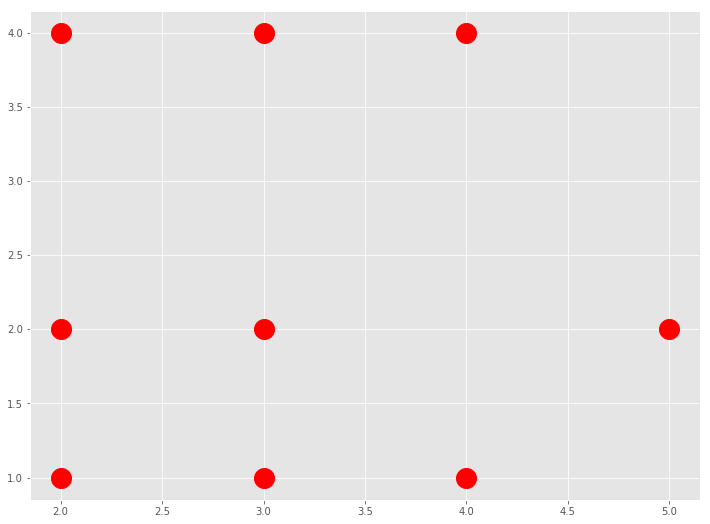

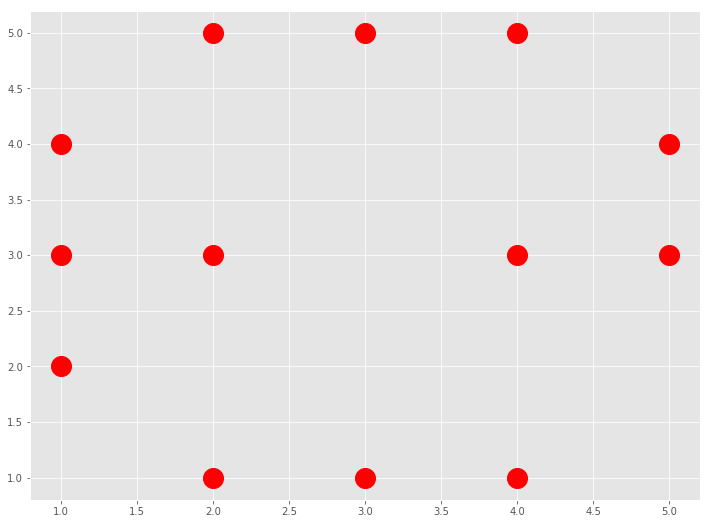

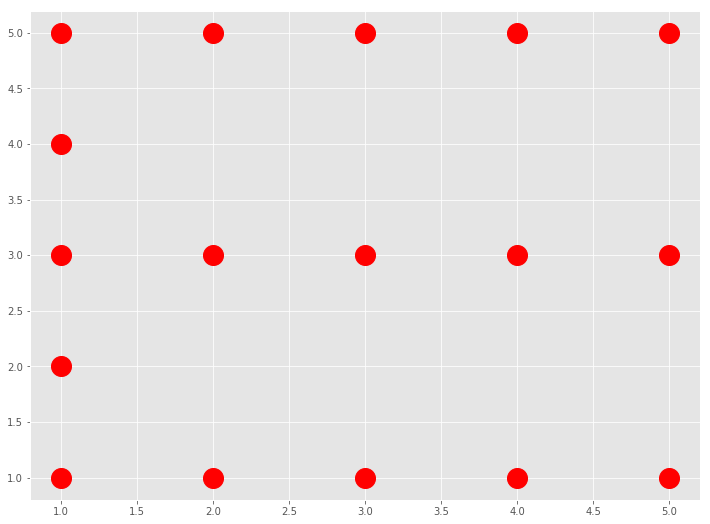

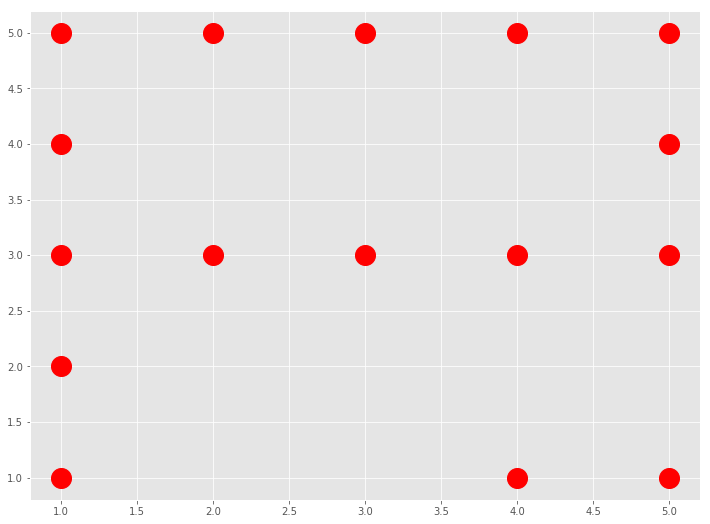

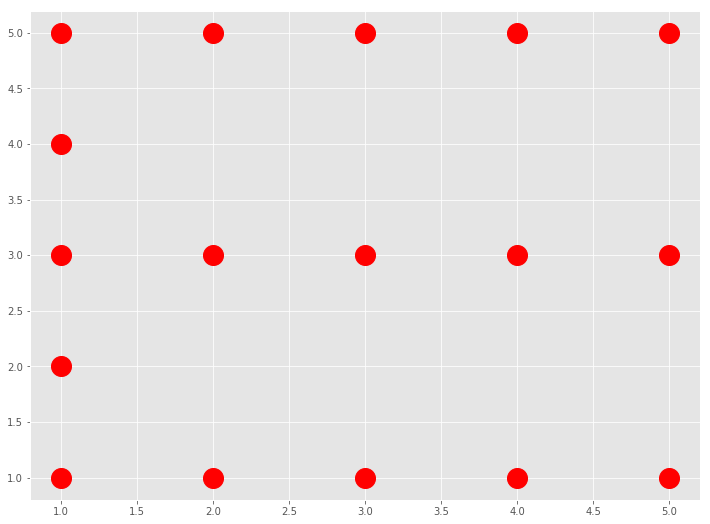

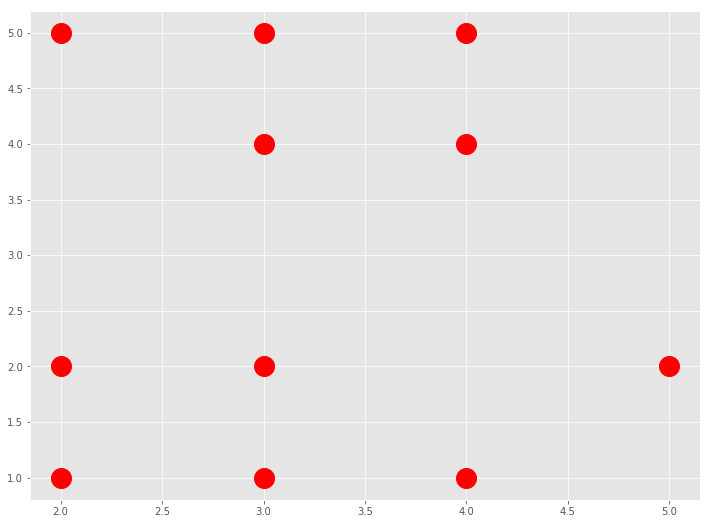

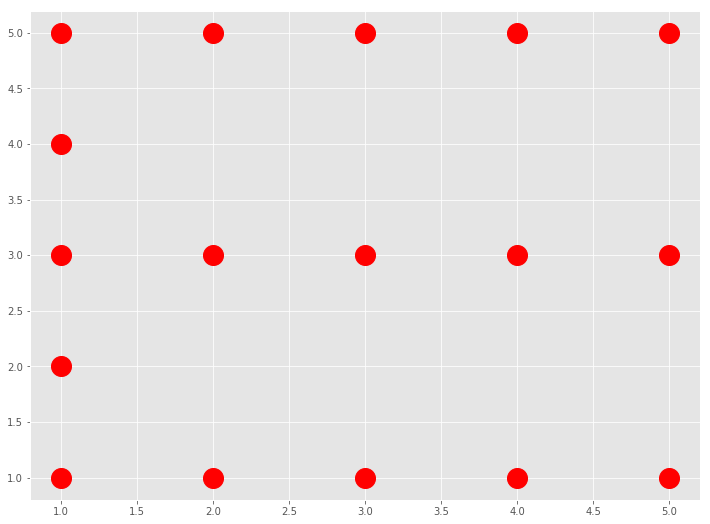

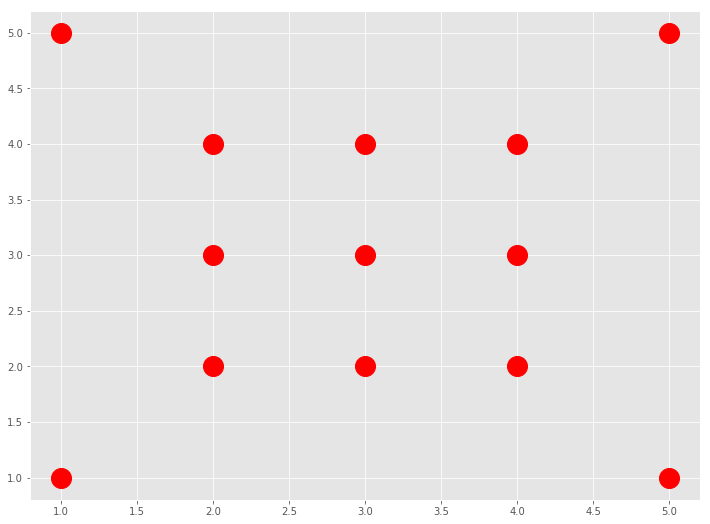

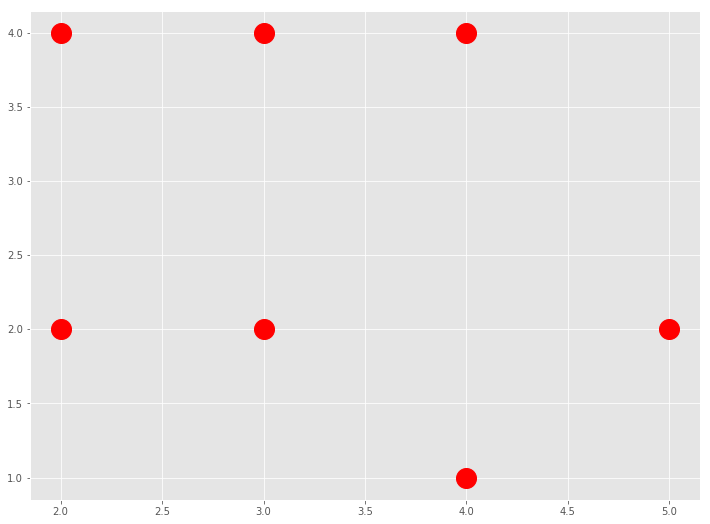

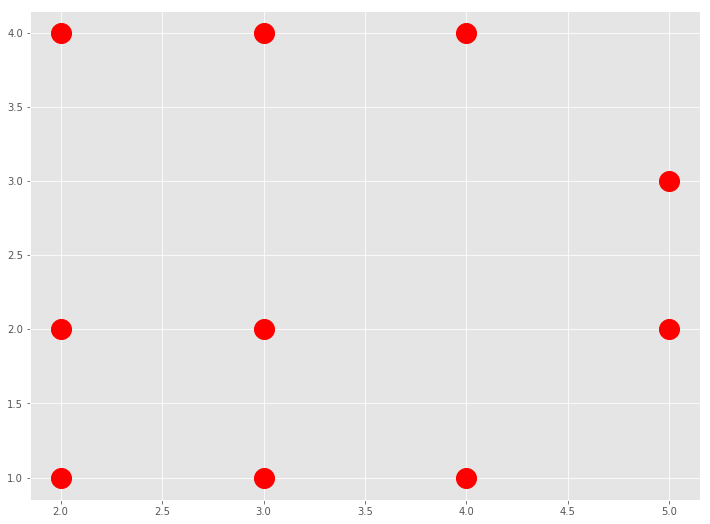

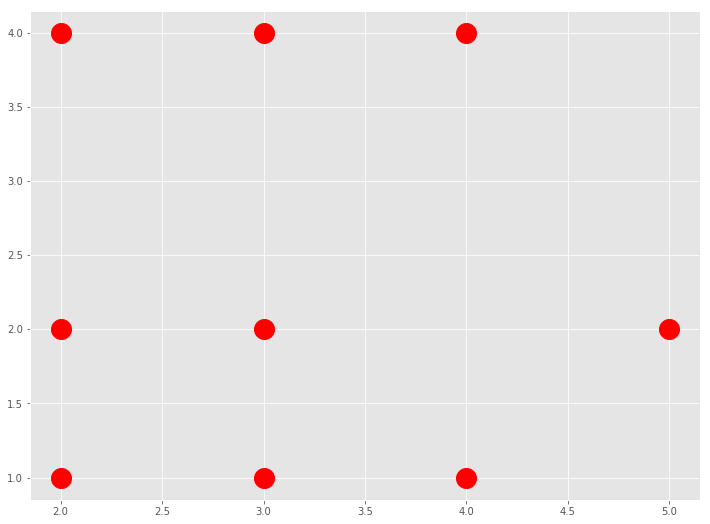

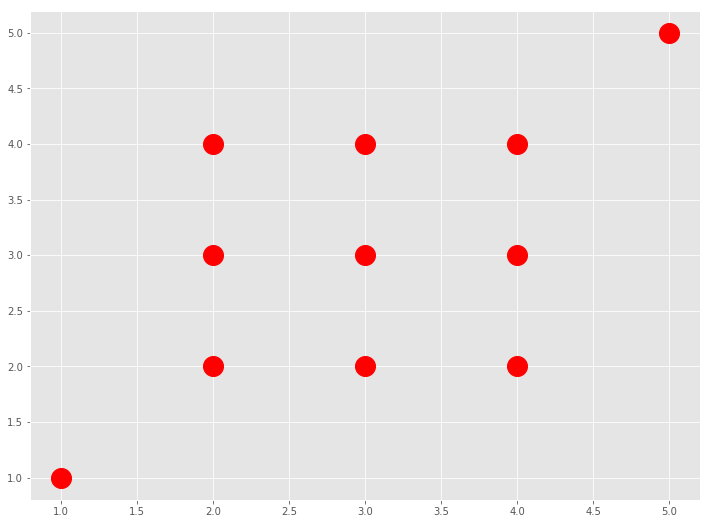

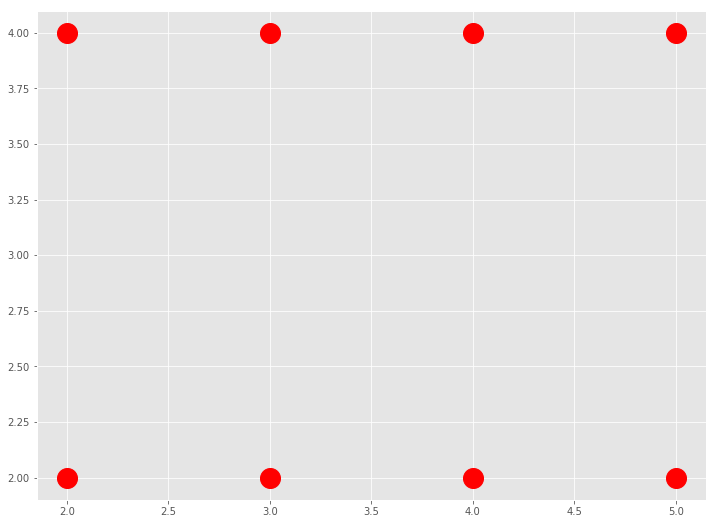

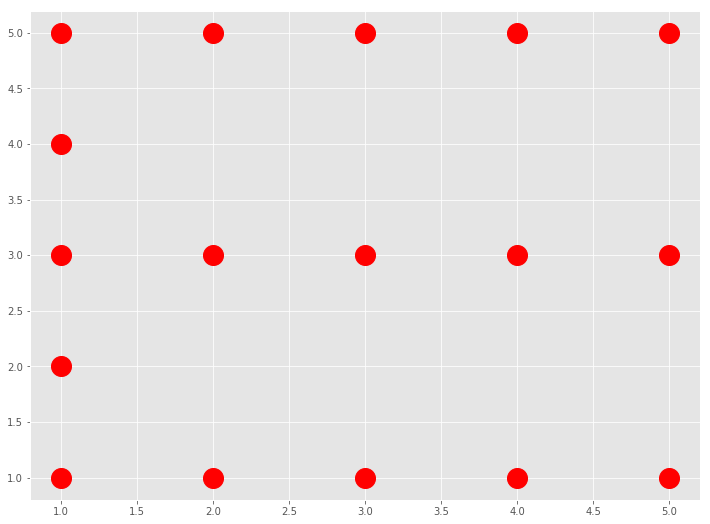

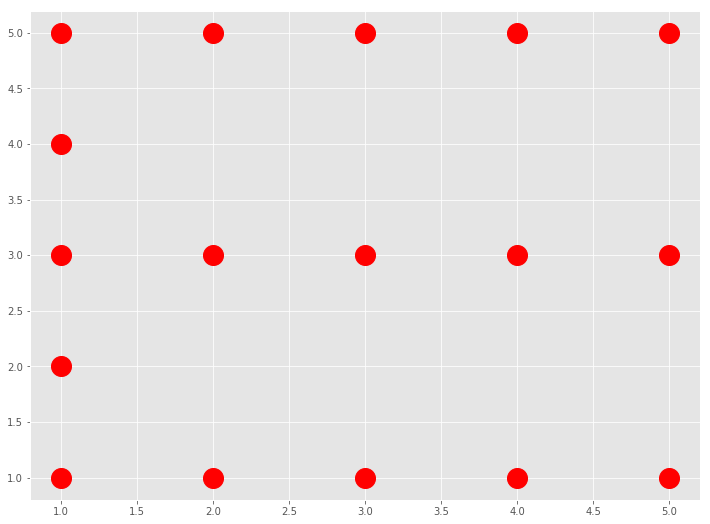

In [8]:
f_attractors = []

for i in range(25):
    test = np.random.randint(2, size=(1, 25))
    test[test == 0] = -1
    out = net.sim(test)
    display_obj(out)
    
    if (out == N).all() or (out == E).all() or (out == R).all() or (out == O).all():
        #if not ((out == N).all() or (out == E).all() or (out == R).all() or (out == O).all()):
        test[test == -1] = 0
        if not ((test == N).all() or (test == E).all() or (test == R).all() or (test == O).all()):
            f_attractors.append(test)

f_attractors = np.unique(f_attractors)

for i in f_attractors:
    display_obj(i)